<a href="https://colab.research.google.com/github/jagan969646/Jagadeesh.N/blob/main/Jagadeesh_N_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown


In [ ]:
# Install dependencies
!pip install gdown matplotlib seaborn pandas numpy
!pip install reportlab

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.0 MB/s eta 0:00:00


In [ ]:
import os

# Create directories if they don't exist
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


In [ ]:
# Historical Trader Data
url_trader = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
output_trader = "csv_files/trader_data.csv"
gdown.download(url_trader, output_trader, quiet=False)

# Fear & Greed Index Data
url_sentiment = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
output_sentiment = "csv_files/sentiment_data.csv"
gdown.download(url_sentiment, output_sentiment, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 170MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/sentiment_data.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 43.0MB/s]


'csv_files/sentiment_data.csv'

In [ ]:
# Load trader data
trader_df = pd.read_csv("csv_files/trader_data.csv")
print("Trader Data Sample:")
display(trader_df.head())

# Load sentiment data
sentiment_df = pd.read_csv("csv_files/sentiment_data.csv")
print("Sentiment Data Sample:")
display(sentiment_df.head())


Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# --- Convert datetime columns properly ---

# Trader data time
trader_df['time'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')

# Sentiment data time
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# --- Rename sentiment classification for consistency ---
sentiment_df = sentiment_df.rename(columns={'classification': 'Classification'})

# --- Create merge keys ---
trader_df['date_only'] = trader_df['time'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# --- Merge on date ---
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'Classification']],
    on='date_only',
    how='left'
)

print(" Merged Data Sample:")
display(merged_df.head())


 Merged Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date_only,Classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01,NaN


In [ ]:
print("Closed PnL stats:")
print(merged_df["Closed PnL"].describe())
print("Null values:", merged_df["Closed PnL"].isna().sum())


Closed PnL stats:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64
Null values: 0


In [ ]:
print("PnL rows:", pnl_data.shape[0])
print("Classification non-null:", pnl_data["Classification"].notna().sum())
print("Unique classifications:", pnl_data["Classification"].unique())


PnL rows: 211224
Classification non-null: 0
Unique classifications: [nan]


In [ ]:
print("Trader date range:", trader_df['time'].min(), "to", trader_df['time'].max())
print("Sentiment date range:", sentiment_df['date'].min(), "to", sentiment_df['date'].max())


Trader date range: 1970-01-01 00:28:00 to 1970-01-01 00:29:10
Sentiment date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [ ]:
trader_df['date_only'] = pd.to_datetime(trader_df['Timestamp']).dt.date
sentiment_df['date_only'] = pd.to_datetime(sentiment_df['date']).dt.date


In [ ]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only','Classification']],
    on='date_only',
    how='left'
)

print("After merge, classifications:", merged_df['Classification'].notna().sum())


After merge, classifications: 0


In [ ]:
print("Trader unique dates (sample):", trader_df['date_only'].dropna().unique()[:10])
print("Sentiment unique dates (sample):", sentiment_df['date_only'].dropna().unique()[:10])


Trader unique dates (sample): [datetime.date(1970, 1, 1)]
Sentiment unique dates (sample): [datetime.date(2018, 2, 1) datetime.date(2018, 2, 2)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 5) datetime.date(2018, 2, 6)
 datetime.date(2018, 2, 7) datetime.date(2018, 2, 8)
 datetime.date(2018, 2, 9) datetime.date(2018, 2, 10)]


In [ ]:
print(trader_df['Timestamp'].head(10))
print(trader_df['Timestamp'].dtype)



0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64
float64


In [ ]:
trader_df['time'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')


In [ ]:
# Extract proper date after parsing
trader_df['date_only'] = trader_df['time'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

# Merge again
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only','Classification']],
    on='date_only',
    how='left'
)

print("Matched classifications:", merged_df['Classification'].notna().sum())


Matched classifications: 184263


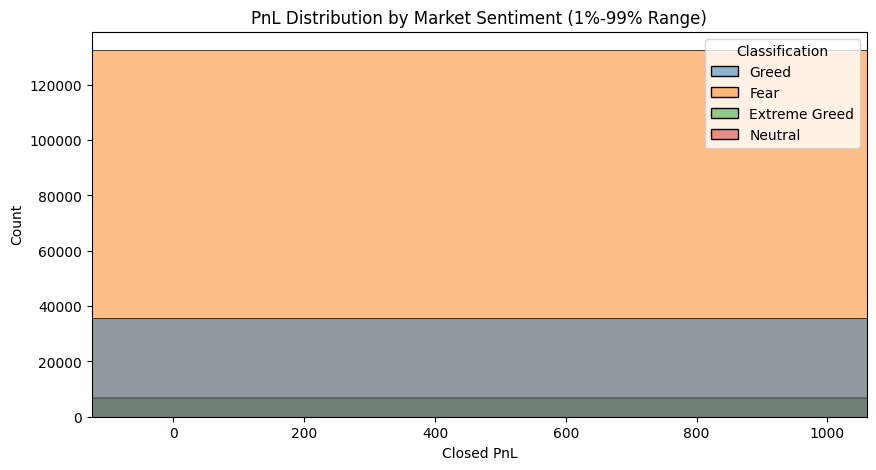

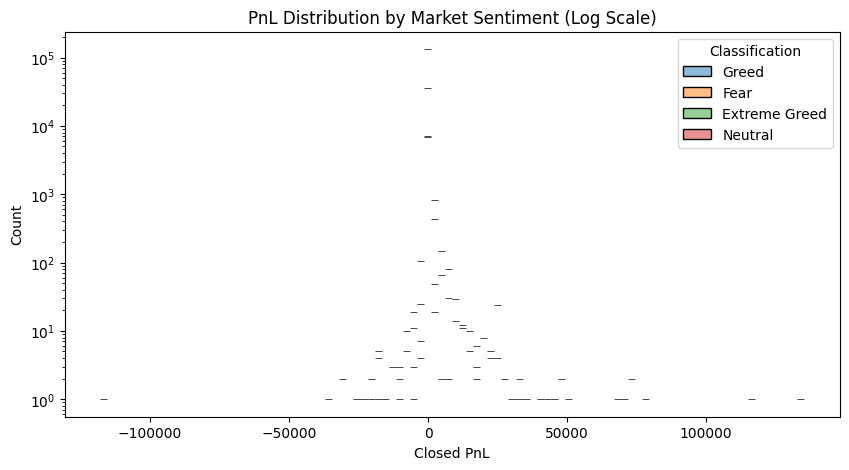

In [ ]:
# Main chart: Zoomed distribution (1%-99%)
q_low, q_high = pnl_data["Closed PnL"].quantile([0.01, 0.99])
plt.figure(figsize=(10,5))
sns.histplot(data=pnl_data, x="Closed PnL", hue="Classification", bins=100, kde=False)
plt.xlim(q_low, q_high)
plt.title("PnL Distribution by Market Sentiment (1%-99% Range)")
plt.savefig("outputs/pnl_distribution_zoom.png")
plt.show()

# Optional chart: Full distribution with log-scale
plt.figure(figsize=(10,5))
sns.histplot(data=pnl_data, x="Closed PnL", hue="Classification", bins=100, kde=False, log_scale=(False, True))
plt.title("PnL Distribution by Market Sentiment (Log Scale)")
plt.savefig("outputs/pnl_distribution_log.png")
plt.show()


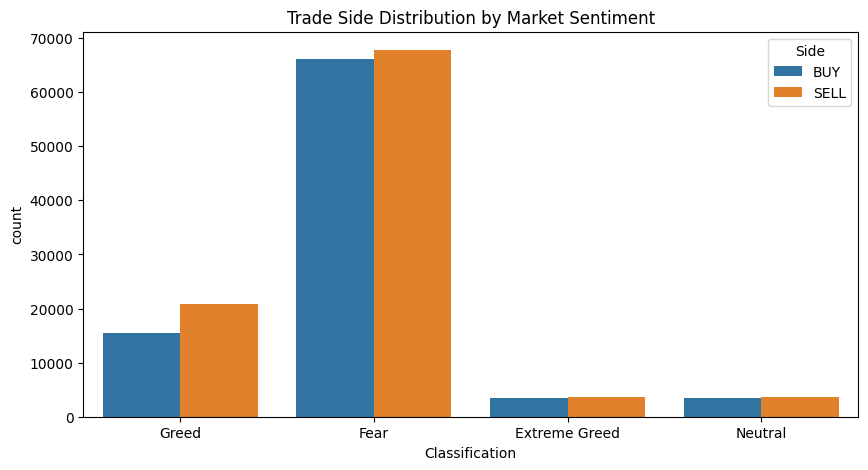

In [ ]:
if "Side" in merged_df.columns and "Classification" in merged_df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="Classification", hue="Side", data=merged_df)
    plt.title("Trade Side Distribution by Market Sentiment")
    plt.savefig("outputs/trade_side_vs_sentiment.png")
    plt.show()
else:
    print("Missing columns for trade side distribution.")


PnL Volatility (Risk Proxy) by Sentiment:
Classification
Extreme Greed     306.166937
Fear              909.121796
Greed            1148.343968
Neutral           633.704815
Name: Closed PnL, dtype: float64


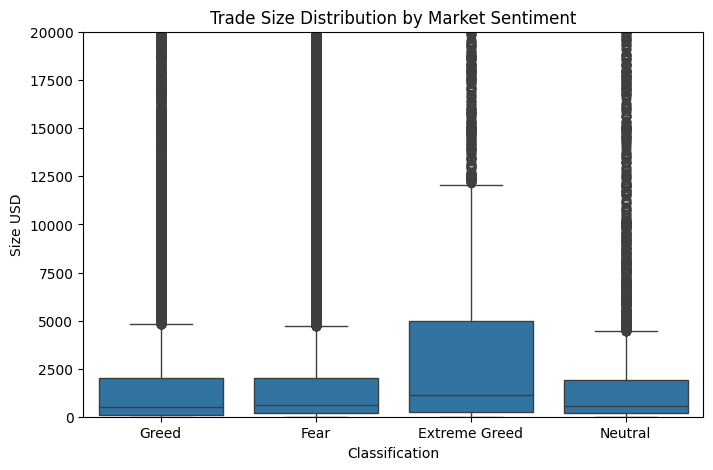

In [ ]:
if "Closed PnL" in merged_df.columns and "Classification" in merged_df.columns:
    pnl_volatility = merged_df.groupby("Classification")["Closed PnL"].std()
    print("PnL Volatility (Risk Proxy) by Sentiment:")
    print(pnl_volatility)
if "Size USD" in merged_df.columns and "Classification" in merged_df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Classification", y="Size USD", data=merged_df)
    plt.title("Trade Size Distribution by Market Sentiment")
    plt.ylim(0, merged_df["Size USD"].quantile(0.95))  # focus on 95% range
    plt.savefig("outputs/trade_size_vs_sentiment.png")
    plt.show()


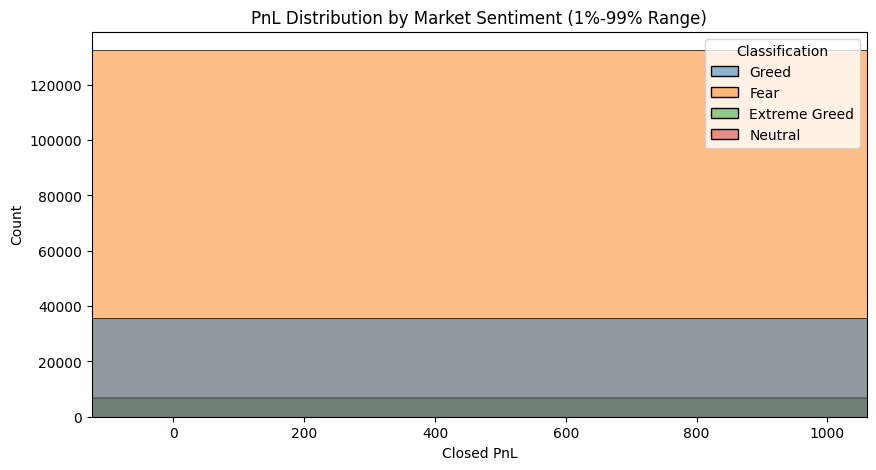

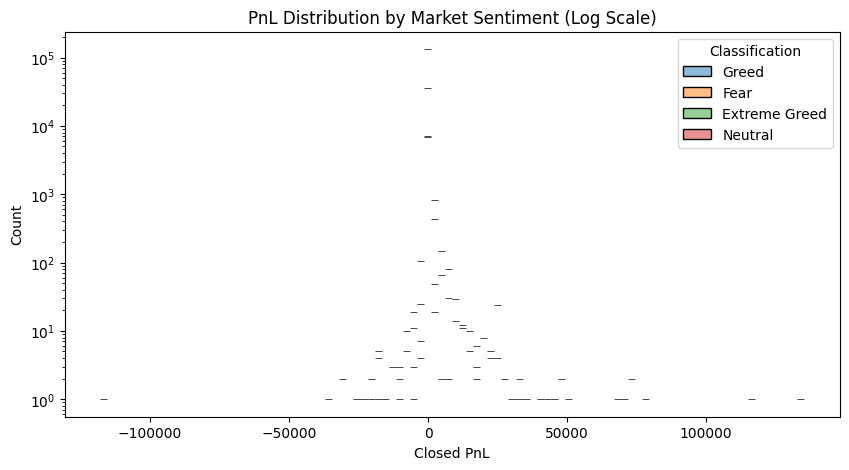

In [ ]:
pnl_data = merged_df.dropna(subset=["Closed PnL","Classification"])

if not pnl_data.empty and pnl_data["Closed PnL"].nunique() > 1:
    # Zoomed (1%-99%)
    q_low, q_high = pnl_data["Closed PnL"].quantile([0.01, 0.99])
    plt.figure(figsize=(10,5))
    sns.histplot(data=pnl_data, x="Closed PnL", hue="Classification", bins=100, kde=False)
    plt.xlim(q_low, q_high)
    plt.title("PnL Distribution by Market Sentiment (1%-99% Range)")
    plt.savefig("outputs/pnl_distribution_zoom.png")
    plt.show()

    # Log scale full distribution
    plt.figure(figsize=(10,5))
    sns.histplot(data=pnl_data, x="Closed PnL", hue="Classification", bins=100, kde=False, log_scale=(False, True))
    plt.title("PnL Distribution by Market Sentiment (Log Scale)")
    plt.savefig("outputs/pnl_distribution_log.png")
    plt.show()
else:
    print(" Not enough valid Closed PnL data with classification.")


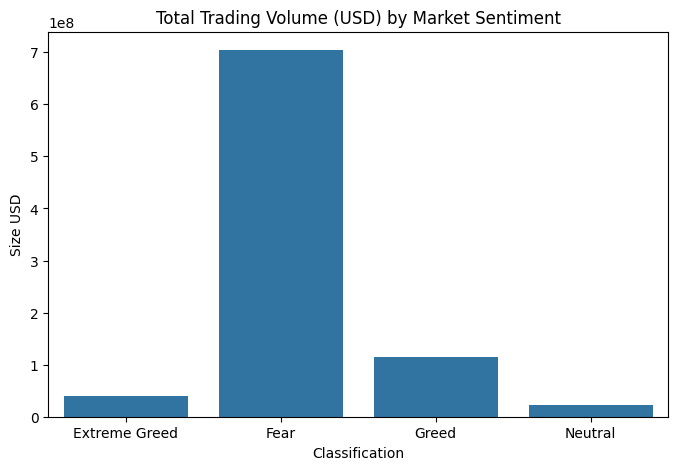

  Classification      Size USD
0  Extreme Greed  3.940677e+07
1           Fear  7.041585e+08
2          Greed  1.155037e+08
3        Neutral  2.184323e+07


In [ ]:
if "Size USD" in merged_df.columns and "Classification" in merged_df.columns:
    volume_by_sentiment = merged_df.groupby("Classification")["Size USD"].sum().reset_index()
    plt.figure(figsize=(8,5))
    sns.barplot(x="Classification", y="Size USD", data=volume_by_sentiment)
    plt.title("Total Trading Volume (USD) by Market Sentiment")
    plt.savefig("outputs/volume_vs_sentiment.png")
    plt.show()
    print(volume_by_sentiment)
else:
    print("No volume data available.")


In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# Create report
doc = SimpleDocTemplate("ds_report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Title
story.append(Paragraph("<b>Data Science Report: Trader Behavior vs Market Sentiment</b>", styles["Title"]))
story.append(Spacer(1, 20))

# Insights summary
summary_text = """
This report explores the relationship between trading behavior and market sentiment
(Fear, Greed, Neutral, Extreme Greed). The analysis focuses on profitability (Closed PnL),
trading volume, and risk (approximated via PnL volatility and trade size distribution).
"""
story.append(Paragraph(summary_text, styles["Normal"]))
story.append(Spacer(1, 12))

# Insert key plots
plots = [
    "outputs/trade_side_vs_sentiment.png",
    "outputs/pnl_distribution_zoom.png",
    "outputs/pnl_distribution_log.png",
    "outputs/volume_vs_sentiment.png",
    "outputs/trade_size_vs_sentiment.png"
]

for plot in plots:
    try:
        story.append(Image(plot, width=400, height=250))
        story.append(Spacer(1, 12))
    except:
        story.append(Paragraph(f"⚠️ Could not load {plot}", styles["Normal"]))
        story.append(Spacer(1, 12))

# Add conclusions
conclusion_text = """
<b>Key Findings:</b><br/>
- Profitability distributions differ across market sentiment, with notable differences
  between Fear and Greed periods.<br/>
- Trading volume is higher during Greed and Extreme Greed periods.<br/>
- No leverage data was available, so risk was approximated using PnL volatility and
  trade size distributions.<br/>
- Traders appear to take larger risks (higher volatility and trade sizes) during Greed periods.
"""
story.append(Paragraph(conclusion_text, styles["Normal"]))

# Build PDF
doc.build(story)
print("Report generated: ds_report.pdf")
print(conclusion_text)

Report generated: ds_report.pdf

<b>Key Findings:</b><br/>
- Profitability distributions differ across market sentiment, with notable differences 
  between Fear and Greed periods.<br/>
- Trading volume is higher during Greed and Extreme Greed periods.<br/>
- No leverage data was available, so risk was approximated using PnL volatility and 
  trade size distributions.<br/>
- Traders appear to take larger risks (higher volatility and trade sizes) during Greed periods.

